# Supply Chain Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import Image

# Rear CSV file Supply Chain Data 
df = pd.read_csv('supply_chain_data.csv')

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [9]:
df.describe()

df.groupby('Product type').agg({'Price': 'mean', 'Revenue generated': 'sum'})


,Price,Revenue generated
Product type,,
cosmetics,57.361058,161521.265999
haircare,46.014279,174455.390605
skincare,47.259329,241628.162133


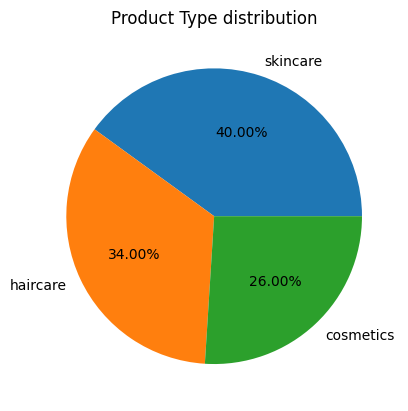

In [12]:
# Display product type distribution in the dataset.
pie_labels = df['Product type'].value_counts().index.to_list()
plt.pie(df['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

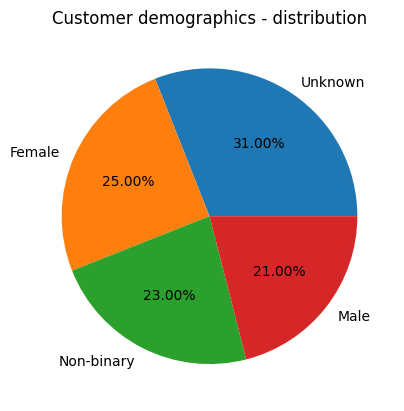

In [14]:
# Draw a plot for Customer demograohics
gender_labels = df['Customer demographics'].value_counts().index.to_list()
plt.pie(df['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

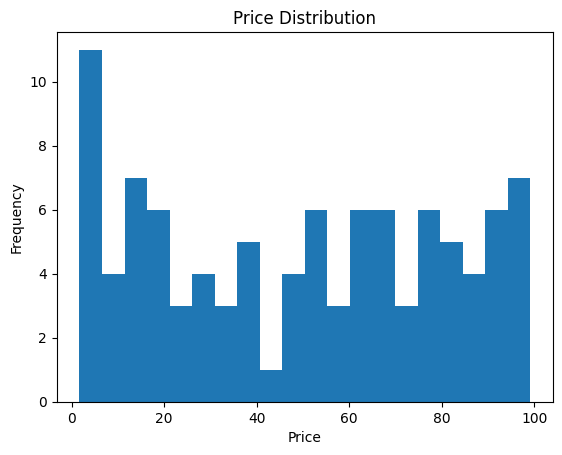

In [10]:
# Price histogram
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [13]:
# Which product is having highest price ?
max_price = df["Price"].max()
df[df["Price"] == max_price]

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
14,skincare,SKU14,99.171329,26,562,8653.570926,Non-binary,54,29,78,...,Kolkata,25,558,14,5.791437,Pending,0.100683,Air,Route B,929.23529


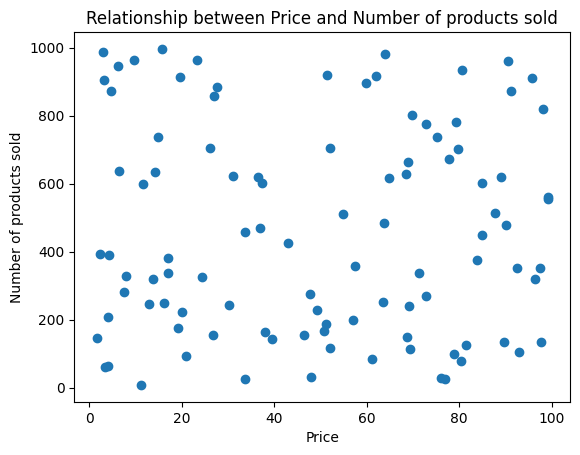

In [11]:
# Relationship between price and quantity of products
plt.scatter(df['Price'], df['Number of products sold'])
plt.xlabel('Price')
plt.ylabel('Number of products sold')
plt.title('Relationship between Price and Number of products sold')
plt.show()


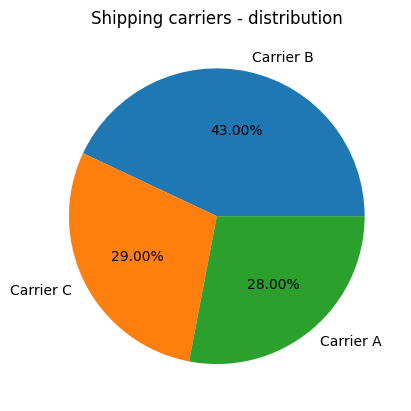

In [15]:
# Draw pie chart
carrier_labels = df['Shipping carriers'].value_counts().index.to_list()
plt.pie(df['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

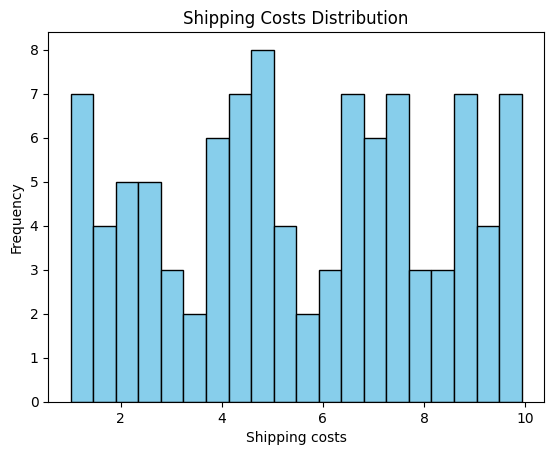

In [16]:
#   Shipping costs histogram
plt.hist(df['Shipping costs'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Shipping costs')
plt.ylabel('Frequency')
plt.title('Shipping Costs Distribution')

# Histogram display
plt.show()

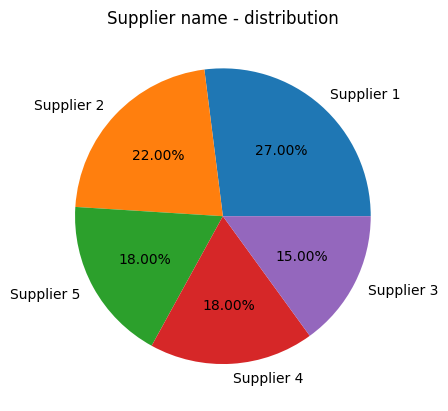

In [17]:
supplier_labels = df['Supplier name'].value_counts().index.to_list();
plt.pie(df['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');

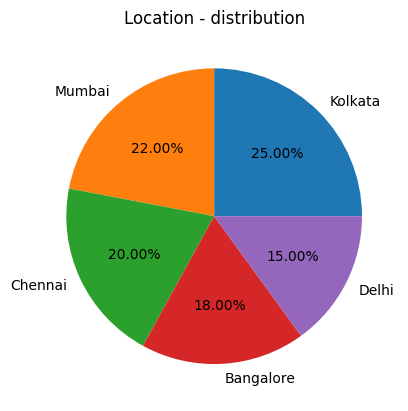

In [18]:
location_labels = df['Location'].value_counts().index.to_list()
plt.pie(df['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

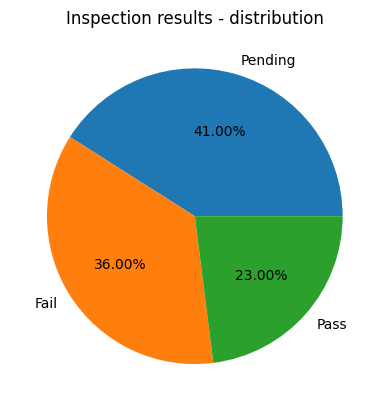

In [19]:
inspection_results_labels=df['Inspection results'].value_counts().index.to_list()

# Draw Pie chart
plt.pie(df['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

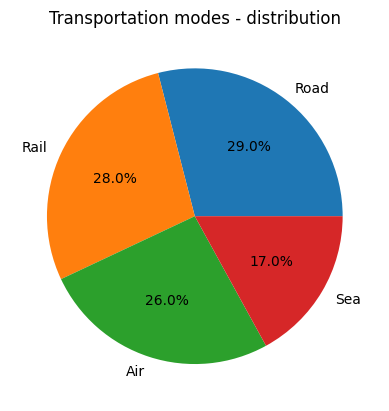

In [20]:
transportation_modes_labels=df['Transportation modes'].value_counts().index.to_list();

plt.pie(df['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

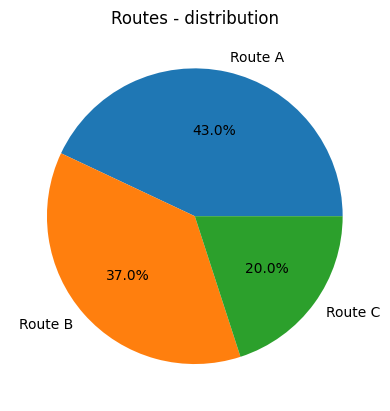

In [21]:
route_labels = df['Routes'].value_counts().index.to_list()

#Draw pie
plt.pie(df['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

# Demand Forecasting

In [22]:
# Observations having high number of 'sold products'
df[["Product type","SKU","Number of products sold","Location"]].sort_values("Number of products sold", ascending=False).head(5)

,Product type,SKU,Number of products sold,Location
10,skincare,SKU10,996,Kolkata
94,cosmetics,SKU94,987,Delhi
9,skincare,SKU9,980,Chennai
36,skincare,SKU36,963,Delhi
37,skincare,SKU37,963,Kolkata


In [23]:
# Observations having lowest number of 'sold products'
df[["Product type","SKU","Number of products sold"]].sort_values("Number of products sold").head(5)

,Product type,SKU,Number of products sold
2,haircare,SKU2,8
45,haircare,SKU45,24
85,cosmetics,SKU85,25
48,haircare,SKU48,29
70,haircare,SKU70,32


In [24]:
# Extract required fields to seperate data frame
df_loc_product_sell = df[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

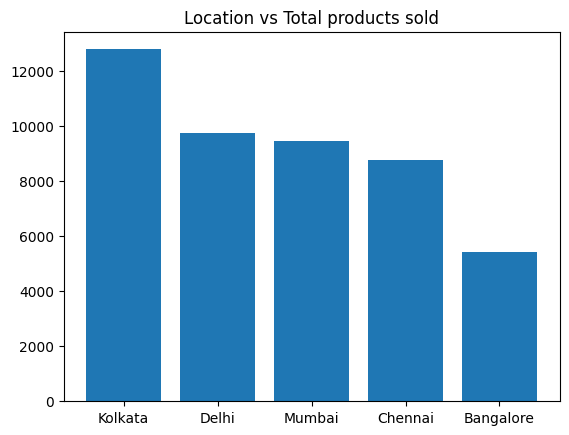

In [25]:
# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

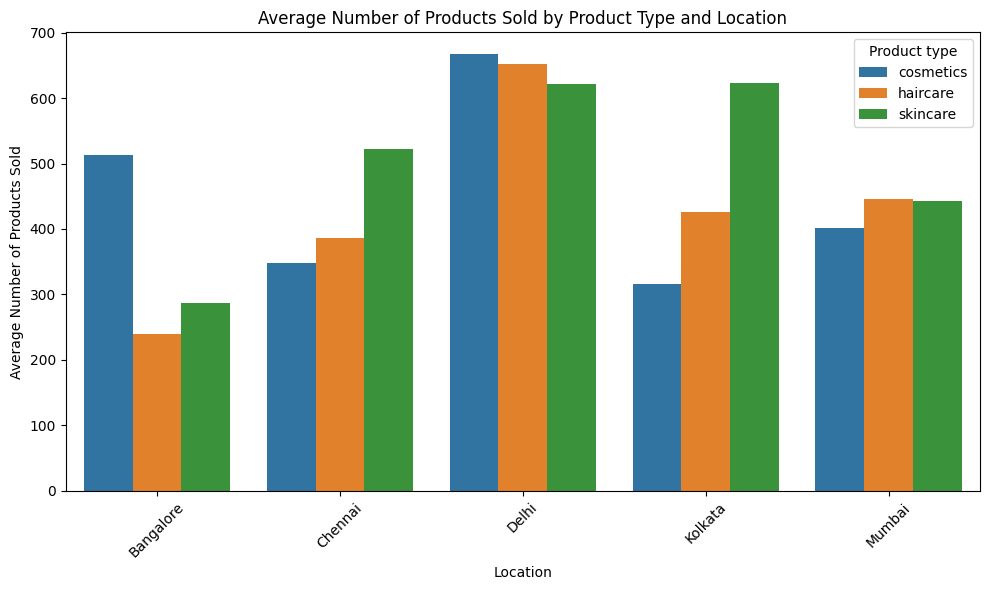

In [35]:
# Create a separate data frame with product type, number of products sold, and location
df_product_type_location = df[["Product type", "Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold' grouped by location and product type
df_product_type_location = df_product_type_location.groupby(["Location", "Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold": "Products sold - average"}, axis=1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

# Draw the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type")
plt.title('Average Number of Products Sold by Product Type and Location')
plt.xlabel('Location')
plt.ylabel('Average Number of Products Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Product types having more defect rates

In [36]:
df_product_type_defect= df[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

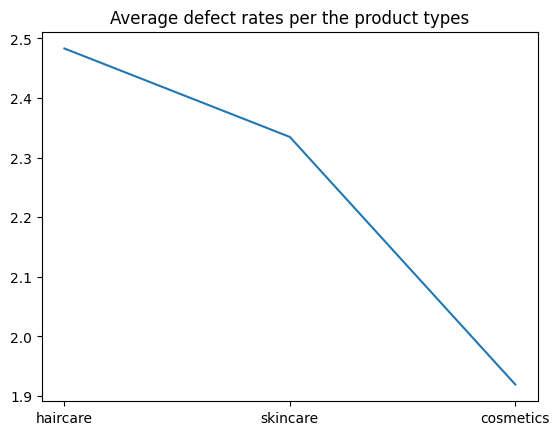

In [37]:
# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

# Transportation cost

In [38]:
# Create a seperate data frame for Transportation cost analysis
df_transport_cost = df[["Product type", "Transportation modes", "Costs"]].copy()

# Segregate records based on the Transportation modes and find mean of each group
df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')

# rename the mean field
df_transport_cost.rename(columns={"Costs":"Avg Costs"}, inplace=True)

#Sort the records based on the mean cost value
df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)

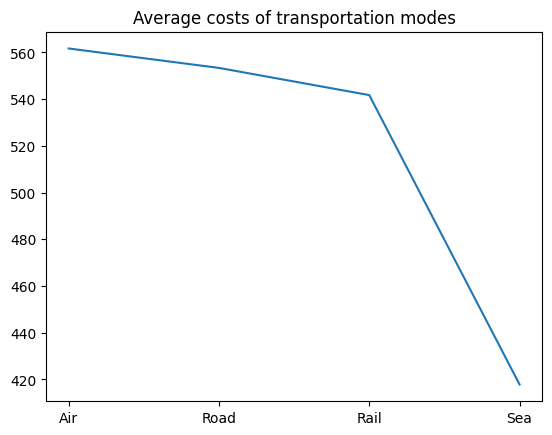

In [39]:

# Visualize the average values of each transportation
plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");

# Lead times of each product type per supplier

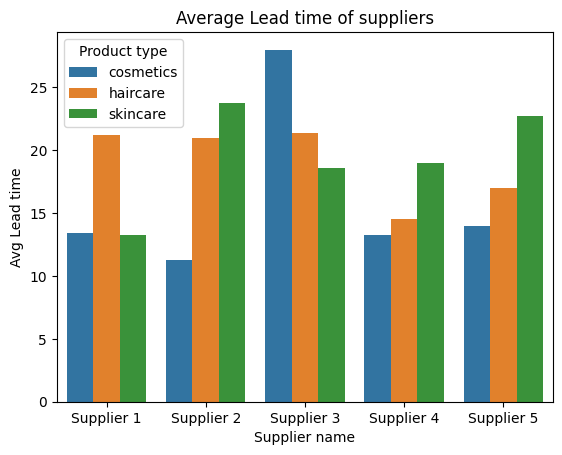

In [40]:
# Create new data frame
df_supplier_product_type = df[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");